# Introduction To Data Science – Assignment 1

---

### Sections A – B – C – D

---

***Instructions***

Due Date: Sunday 18th September 2022 – 11:59PM

Name the file in the format Lyyxxxx and save it as .ipynb (e.g. L201234.ipynb)

Submission will be taken on **GitHub and Google Classroom (submit the .ipynb file)** - Instructions to upload onto GitHub are provided in the link https://docs.google.com/document/d/1BR1ULOGeGWJVU6Rr6Qty1FR-quVRZyRvQGII6nEs-wo/edit?usp=sharing

After uploading and submitting the .ipynb file onto Google Classroom, also private comment the link to the GitHub repository.

All source files needed to complete this assignment can be found on the following Google Drive link https://drive.google.com/drive/folders/1VrkaVcExGWqilSeh50WZe4gUBjmUiJ9b?usp=sharing

TA Emails

Section A, C - Muhammad Maarij l192347@lhr.nu.edu.pk

Section B, D - Hira Ijaz l192377@lhr.nu.edu.pk

Happy Coding 😊

---

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


---
## Question 1
---

Define a procedure called "check_input" that takes an input as a square list of lists (2D Matrix of N x N) and returns a boolen "true" if the input is valid or "false" otherwise, according to the following criteria.

1. Each coloumn must contain numbers from between 1 and N, with no duplicates.
2. Each row must contain numbers from between 1 and N, with no duplicates.

In [2]:
# define procedure here
def check_input(matrix):
    for row in matrix:
        for element in row:
            if type(element) != int:
                return False
        if len(row) != len(set(row)):
            return False
    
    for i in range(len(matrix)):
        column = []
        for row in matrix:
            column.append(row[i])
        if len(column) != len(set(column)):
            return False
    return True

In [3]:
# run this block to test code after defining the procedure

test1 = [[1, 2, 3],
        [2, 3, 1],
        [3, 1, 2]]

test2 = [[1, 2, 3, 4],
        [2, 3, 1, 3],
        [3, 1, 2, 3],
        [4, 4, 4, 4]]

test3 = [['a', 'b', 'c'],
        ['b', 'c', 'a'],
        ['c', 'a', 'b']]

print(check_input(test1)) # must return true
print(check_input(test2)) # must return false
print(check_input(test3)) # must return false

True
False
False


---
## Question 2
---

**Part A** - Import the file "StudentMarkSheet.csv" as a Pandas DataFrame and print the information for the dataframe

In [4]:
mark_sheet_data = pd.read_csv('StudentMarkSheet.csv')
mark_sheet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Student name  200 non-null    object 
 1   Exam name     199 non-null    object 
 2   Exam date     200 non-null    object 
 3   Marks         197 non-null    float64
dtypes: float64(1), object(3)
memory usage: 6.4+ KB


**Part B** - Remove any rows that do not contain all the data. Also print the following information.

1. Number of rows before
2. Number of rows containing null data
3. Number of rows after

In [5]:
print("Total No Of Rows ",len(mark_sheet_data))
mark_sheet_null_rows = mark_sheet_data[mark_sheet_data.isnull().any(axis=1)]
print("Total No Of Null Rows ",len(mark_sheet_null_rows))
mark_sheet_data = mark_sheet_data.dropna()
print("Total No Of Rows After Dropping Null Rows ",len(mark_sheet_data))

Total No Of Rows  200
Total No Of Null Rows  4
Total No Of Rows After Dropping Null Rows  196


**Part C** - Print all the marks along with the subject for the student named "James Walker"

In [6]:
james_walker = mark_sheet_data.loc[mark_sheet_data["Student name"] == "James Walker"]
james_walker[["Exam name","Marks"]]

,Exam name,Marks
0,Biology,31.0
42,Chemistry,61.0
71,Mathematics,23.0
150,Physics,100.0
180,Sociology,73.0


---
## Question 3
---

**Part A** - From the DataFrame created in Question 2, calculate the average marks for each subject

In [7]:
subjects = {}
for i in mark_sheet_data["Exam name"].unique():
    subjects[i] = mark_sheet_data.loc[mark_sheet_data["Exam name"] == i]["Marks"].mean()
subjects = pd.DataFrame.from_dict(subjects,orient='index',columns=["Average Marks"])
subjects

,Average Marks
Biology,47.894737
Chemistry,50.576923
Mathematics,48.972222
Philosophy,47.270270
Physics,51.761905
Sociology,56.026316


**Part B** - Using the averages you just calculated, plot a Bar Graph showing the average marks of each subject

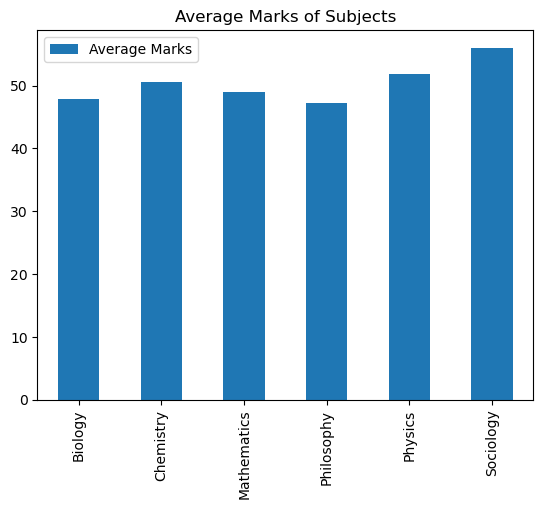

In [8]:
subjects.plot(kind="bar",title="Average Marks of Subjects")
plt.show()

---
## Question 4
---

**Part A** - Import the file "CatData.csv" and preprocess it to remove any null values

In [9]:
cat_data = pd.read_csv('CatData.csv')
cat_data = cat_data.dropna()

**Part B** - Identify the independant and dependant variables (comment answer below)

In [10]:
# dependant variable:  mass
# independant variable: tail_length

**Part C** - Create a linear regression model using sklearn and fit it to the data you just imported


In [11]:
n = len(cat_data) * 0.8

train_data = cat_data[:int(n)]
test_data = cat_data[int(n):]

train_x = np.array(train_data[["Tail Length (cm)"]])
train_y = np.array(train_data[["Mass (kg)"]])

lr = linear_model.LinearRegression()

lr.fit(train_x,train_y)

slope = lr.coef_[0]
intercept = lr.intercept_


**Part D** - Print the values for slope and y-intercept

In [12]:
print("Slope = ",slope)
print("Intercept = ",intercept)

Slope =  [0.48913766]
Intercept =  [-5.57328662]


**Part E** - Plot a scatter graph of the original data and a regression line on the same figure (example with dummy data shown below)

![](https://drive.google.com/uc?export=view&id=1o_NAsNjfx7zAh9m-UjvWB3rta6uraKdY)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


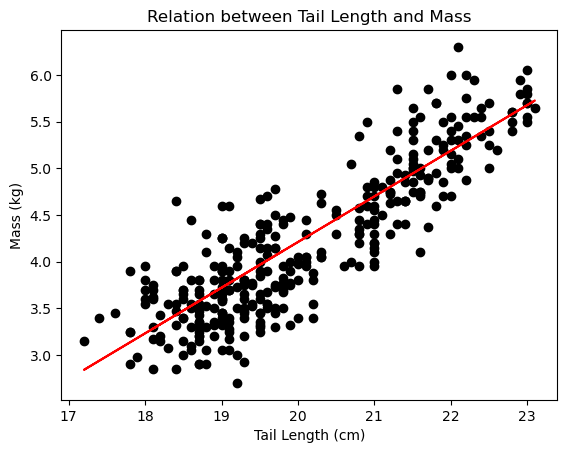

In [13]:
predicted_values = lr.predict(cat_data[["Tail Length (cm)"]])
plt.scatter(cat_data["Tail Length (cm)"],cat_data["Mass (kg)"],color="black")
plt.plot(cat_data["Tail Length (cm)"],predicted_values,color="red")
plt.xlabel("Tail Length (cm)")
plt.ylabel("Mass (kg)")
plt.title("Relation between Tail Length and Mass")
plt.show()